# The Sparks Foundation Internship
**Data Science & Business Analytics Tasks**

Task-II :- **Prediction using Unsupervised ML**

Concept :- **Clustering with k means**

Description :- **From the given ‘Iris’ dataset, predict the optimum number of clusters**

Dataset : https://bit.ly/3kXTdox

Author :- **Akshay Waghela**

Language :- Python in Jupyter Notebook

To start, let's import required libraries for the given task.

In [14]:
# Importing Important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


#### Importing the Data of iris with different characteristics

In [15]:

#Loading the iris data
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()    #See first five rows
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### The optimum number of clusters for K Means

In [16]:
#Optimum Number of Clusters for k-means Classification

x = iris_data.iloc[:,[0,1,2,3]].values     # spliting data into for columns \

from sklearn.cluster import KMeans
wcss = []     #Within Clusters Sum of Squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

#### WCSS knowledge
WCSS shows variation of the data from centered value.

WCSS is less when the data is of simliar kind.
Else it has mixed kind of data for which clusters are used for different kinds.

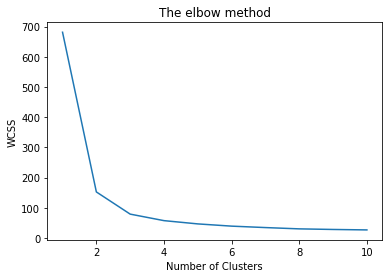

In [17]:
#PLottinf of the results
#observation of "The elbow"
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Elbow Method
'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 

This is when the within cluster **(WCSS)** doesn't decrease significantly with every iteration.

Hence, the optimum number of clusters is **3**

It means there are 3 types of data that make 3 clusters having different wcss

In [18]:
#Creating k-means classifier for given data
kmeans = KMeans(n_clusters=3, init="k-means++",
               max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

## Visualization

Let's visualize the 3 different clusters with their means.

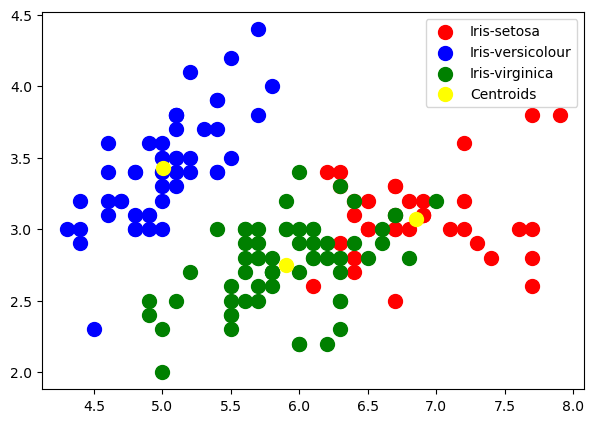

In [24]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(7,5),dpi=100)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

This concludes the K-Means Workshop.